# Explorer un corpus

## Imports

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [2]:
path = "../data/txt/"
files = sorted(os.listdir(path)) # stocker dans 'files' la liste des fichiers contenus dans le dossier 'txt'

In [3]:
len(files)

2828

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'Bxl_1849_Tome_II1_Part_5.txt'

In [5]:
type(chaine)

str

In [6]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1849', 'Tome', 'II1', 'Part', '5.txt']

In [7]:
# Accéder à l'année
year = chaine_split[1]
year

'1849'

In [8]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'184'

In [9]:
year[-1]

'9'

In [10]:
year[:3] + '0s'

'1840s'

## Quelques statistiques

In [11]:
all_years = [str(year) for year in range(1847, 1979)]
print(all_years)
print(f"\nIl y a a priori {len(all_years)} années à traiter dans notre corpus")

['1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',

In [12]:
count_decade = defaultdict(int) # initialiser le dico des décennies
count_years = defaultdict(int)
count_cities = defaultdict(int) # initialiser le dico des villes
count_tomes = defaultdict(int) # initialiser le dico pour les tomes
covered_years = set() # initialiser un set de données pour les années couvertes (liste univoque)

for f in files: # pour tous les fichiers contenus dans 'files'
    if "_" in f and f.endswith("txt"): # si le nom du fichier contient '_' et que le fichier termine par l'extension 'txt' alors
        elems = f.split("_") # splitter les noms et les stocker dans le tableau 'elems'
        city = elems[0] # le 1er élément de chaque tableau contient la ville à stocker dans le dico approprié
        year = elems[1] # le 2e élément contient l'année à stocker
        tome = elems[3] # le 4e élément contient le numéro du tome
        covered_years.add(year) # ajouter au set les années couvertes par le corpus
        decade = year[:3] + "0s" # transformer les années en décades
        count_decade[decade] += 1 # compter le nombre de décennies
        count_cities[city] += 1 # le nombre de villes
        count_tomes[tome] += 1 # et le nom des tomes
        count_years[year] += 1
    else:
        print(f"Anomalous file: {f}") # sinon afficher le nom du fichier corrompus

In [13]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 2677 bulletins de Bruxelles and 151 de Laeken


In [14]:
nb_rap = count_tomes['RptAn'] # stocker les rapports dans une variable
print(f"{len(files) - nb_rap} documents sont des bulletins et {nb_rap} documents sont des rapports annuels") # effectuer la soustraction pour distinguer les bulletins des rapports

print(len(covered_years))

print(count_years)

print(f"\nIl manque par conséquent, {len(all_years)-len(covered_years)} années dans notre corpus")

2646 documents sont des bulletins et 182 documents sont des rapports annuels
123
defaultdict(<class 'int'>, {'1847': 5, '1848': 3, '1849': 12, '1850': 11, '1851': 12, '1852': 10, '1854': 9, '1855': 13, '1856': 13, '1857': 11, '1858': 9, '1859': 9, '1860': 10, '1861': 5, '1862': 10, '1863': 8, '1864': 5, '1865': 11, '1866': 13, '1867': 10, '1868': 9, '1869': 13, '1870': 13, '1871': 13, '1872': 10, '1873': 4, '1874': 15, '1876': 10, '1877': 13, '1878': 11, '1879': 22, '1880': 22, '1881': 26, '1882': 33, '1883': 25, '1884': 25, '1885': 33, '1886': 29, '1887': 25, '1888': 31, '1889': 21, '1890': 33, '1891': 28, '1892': 26, '1893': 25, '1894': 19, '1895': 8, '1896': 30, '1897': 25, '1898': 21, '1899': 30, '1900': 24, '1901': 35, '1902': 18, '1903': 33, '1904': 20, '1905': 29, '1906': 16, '1907': 19, '1908': 16, '1909': 23, '1910': 36, '1911': 38, '1912': 38, '1913': 36, '1914': 2, '1915': 5, '1918': 1, '1919': 14, '1920': 19, '1921': 9, '1922': 4, '1923': 22, '1924': 7, '1925': 15, '1926': 

In [15]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1853, 1875, 1916, 1917, 1940, 1941, 1942, 1943, 1944


## Visualisation du nombre de bulletins par décennies

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

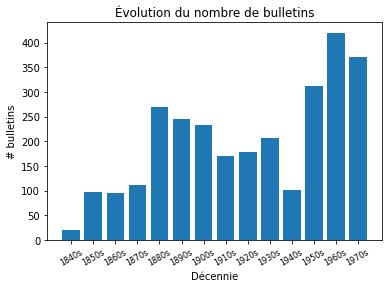

In [16]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# bulletins')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Évolution du nombre de bulletins')
plt.show()